<a href="https://colab.research.google.com/github/CLAUDERNORONHA/SUMARIZACAO_TEXTO/blob/main/Sumariza%C3%A7%C3%A3o_com_o_Algoritmo_de_Luhn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sumarização de textos com o Algoritmo de Luhn

- https://courses.ischool.berkeley.edu/i256/f06/papers/luhn58.pdf

In [ ]:
import re
import nltk
import string
import heapq
import numpy

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
texto_original = """A inteligência artificial é a inteligência similar à humana máquinas. 
                    Definem como o estudo de agente artificial com inteligência. 
                    Ciência e engenharia de produzir máquinas com inteligência. 
                    Resolver problemas e possuir inteligência. 
                    Relacionada ao comportamento inteligente. 
                    Construção de máquinas para raciocinar. 
                    Aprender com os erros e acertos. 
                    Inteligência artificial é raciocinar nas situações do cotidiano."""
texto_original = re.sub(r'\s+', ' ', texto_original)
texto_original

'A inteligência artificial é a inteligência similar à humana máquinas. Definem como o estudo de agente artificial com inteligência. Ciência e engenharia de produzir máquinas com inteligência. Resolver problemas e possuir inteligência. Relacionada ao comportamento inteligente. Construção de máquinas para raciocinar. Aprender com os erros e acertos. Inteligência artificial é raciocinar nas situações do cotidiano.'

In [ ]:
stopwords = nltk.corpus.stopwords.words('portuguese')
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
stopwords.append('ser')
stopwords.append('além')

In [ ]:
print(stopwords)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [ ]:
def preprocessamento(texto):
  texto_formatado = texto.lower()
  tokens = []
  for token in nltk.word_tokenize(texto_formatado):
    tokens.append(token)

  tokens = [palavra for palavra in tokens if palavra not in stopwords and palavra not in string.punctuation]
  texto_formatado = ' '.join([str(elemento) for elemento in tokens if not elemento.isdigit()])

  return texto_formatado

## Função para calcular a nota das sentenças

In [ ]:
teste = ['a', 'b', 'c']
teste.index('g')

ValueError: ignored

In [ ]:
def calcula_nota_sentenca(sentencas, palavras_importantes, distancia):
  notas = []
  indice_sentenca = 0

  for sentenca in [nltk.word_tokenize(sentenca.lower()) for sentenca in sentencas]:
    #print('---------------')
    #print(sentenca)
    indice_palavra = []
    for palavra in palavras_importantes:
      #print(palavra)
      try:
        indice_palavra.append(sentenca.index(palavra))
      except ValueError:
        pass  # utilizado par aquando encontrar o erro, ele faz o sistema não parar.
    
    indice_palavra.sort()
    #print(indice_palavra)
             
             #quando não encontrar palavras importantes o programa vai estar em continuação
    if len(indice_palavra) == 0:
      continue
   
    # UTILIZAMOS PARA PERCORRER TODA BASE DE DADOS PELO INDICE
    # [0, 1, 3, 5]
    lista_grupos = []
    grupo = [indice_palavra[0]]
    i = 1
    while i < len(indice_palavra):
      if indice_palavra[i] - indice_palavra[i - 1] < distancia:
        grupo.append(indice_palavra[i])
        #print('grupo: ', grupo)
      else:
        lista_grupos.append(grupo[:])
        grupo = [indice_palavra[i]]
        #print('grupo: ', grupo)
      i += 1
    lista_grupos.append(grupo)
    #print('todos os grupos: ', lista_grupos)
  
  #SOMAR A QUANTIDADE DE PALAVRAS DO GRUPO E APRESENTAR.
    nota_maxima_grupo = 0
    for g in lista_grupos:
      #print(g)
      palavras_importantes_no_grupo = len(g)
      total_palavras_no_grupo = g[-1] - g[0] + 1
      #print('palavras importantes no grupo ', palavras_importantes_no_grupo)
      #print('total de palavras ', total_palavras_no_grupo)
      
      # FAZER O CALCULOS DAS NOTAS
      nota = 1.0 * palavras_importantes_no_grupo**2 / total_palavras_no_grupo
      #print('nota grupo', nota)

      if nota > nota_maxima_grupo:
        nota_maxima_grupo = nota

    notas.append((nota_maxima_grupo, indice_sentenca))
    indice_sentenca += 1

  #print('notas finais das senteças', notas)
  return notas

In [ ]:
teste = [0, 1, 3, 4, 6, 9]
teste[-1], teste[0] + 1

## Função para sumarizar os textos

In [ ]:
def sumarizar(texto, top_n_palavras, distancia, quantidade_sentencas):
  sentencas_originais = [sentenca for sentenca in nltk.sent_tokenize(texto)]
  #print(sentencas_originais)
  
  sentencas_formatadas = [preprocessamento(sentenca_original) for sentenca_original in sentencas_originais]
  #print(sentencas_formatadas)
  
  palavras = [palavra for sentenca in sentencas_formatadas for palavra in nltk.word_tokenize(sentenca)]
  #print(palavras)
  
  frequencia = nltk.FreqDist(palavras)
  #return frequencia
 
  top_n_palavras = [palavra[0] for palavra in frequencia.most_common(top_n_palavras)]
  #print(top_n_palavras)
 
  notas_sentencas = calcula_nota_sentenca(sentencas_formatadas, top_n_palavras, distancia)
  #print(notas_sentencas)
  
  melhores_sentencas = heapq.nlargest(quantidade_sentencas, notas_sentencas)
  #print(melhores_sentencas)
  
  melhores_sentencas = [sentencas_originais[i] for (nota, i) in melhores_sentencas]
  #print(melhores_sentencas)
  #print(sentencas_originais)
  return sentencas_originais, melhores_sentencas, notas_sentencas

In [ ]:
sentencas_originais, melhores_sentencas, notas_sentencas = sumarizar(texto_original, 5, 3, 3)

In [ ]:
sentencas_originais

['A inteligência artificial é a inteligência similar à humana máquinas.',
 'Definem como o estudo de agente artificial com inteligência.',
 'Ciência e engenharia de produzir máquinas com inteligência.',
 'Resolver problemas e possuir inteligência.',
 'Relacionada ao comportamento inteligente.',
 'Construção de máquinas para raciocinar.',
 'Aprender com os erros e acertos.',
 'Inteligência artificial é raciocinar nas situações do cotidiano.']

In [ ]:
melhores_sentencas

['Construção de máquinas para raciocinar.',
 'A inteligência artificial é a inteligência similar à humana máquinas.',
 'Relacionada ao comportamento inteligente.']

In [ ]:
notas_sentencas

[(2.6666666666666665, 0), (2.0, 1), (2.0, 2), (1.0, 3), (2.0, 4), (3.0, 5)]

## Visualização do resumo

In [ ]:
def visualiza_resumo(titulo, lista_sentencas, melhores_sentencas):
  from IPython.core.display import HTML
  texto = ''

  display(HTML(f'<h1>Resumo do texto - {titulo}</h1>'))
  for i in lista_sentencas:
    if i in melhores_sentencas:
      texto += str(i).replace(i, f"<mark>{i}</mark>")
    else:
      texto += i
  display(HTML(f""" {texto} """))

In [ ]:
visualiza_resumo('Teste', sentencas_originais, melhores_sentencas)

## Extração de texto da internet

In [ ]:
!pip install goose3

     |████████████████████████████████| 92kB 4.1MB/s 


In [ ]:
from goose3 import Goose

In [ ]:
g = Goose()
url = 'https://iaexpert.academy/2020/11/09/ia-preve-resultado-das-eleicoes-americanas/'
artigo = g.extract(url)

In [ ]:
#Tras o texto já limpo.
artigo.cleaned_text

'Nas eleições presidenciais americanas de 2016, a maioria das predições apontavam para a vitória de Hillary Clinton. Entretanto, a história nos mostrou o resultado oposto, e Donald Trump foi o presidente nos últimos 4 anos. Desta vez, os estatísticos reexaminaram seus modelos, para aumentar o grau de confiabilidade nos seus resultados. Nesta tentativa de otimização das predições, a inteligência artificial certamente não ficou de fora.\n\nO modelo desenvolvido pelo Dr. Hernan Makse, físico estatístico da Universidade da Cidade de Nova York, baseou suas predições em uma rede neural treinada para processar os sentimentos expressos nas redes sociais. O algoritmo fez a análise de cerca de 1 bilhão de tweets para chegar a uma estimativa dos resultados do pleito. No dia da eleição, 3 de novembro, o modelo estava indicando a vitória de Joe Biden.\n\nO Dr. Makse disse que seu trabalho começou já na eleição de 2016, e foi testado novamente nas eleições na Argentina ano passado. Desta vez, o mode

In [ ]:

#quando tem um texto grande é interessante testar mais de 100 palavras
sentencas_originais, melhores_sentencas, notas_sentencas = sumarizar(artigo.cleaned_text, 300, 10, 5)

In [ ]:
sentencas_originais

['Nas eleições presidenciais americanas de 2016, a maioria das predições apontavam para a vitória de Hillary Clinton.',
 'Entretanto, a história nos mostrou o resultado oposto, e Donald Trump foi o presidente nos últimos 4 anos.',
 'Desta vez, os estatísticos reexaminaram seus modelos, para aumentar o grau de confiabilidade nos seus resultados.',
 'Nesta tentativa de otimização das predições, a inteligência artificial certamente não ficou de fora.',
 'O modelo desenvolvido pelo Dr. Hernan Makse, físico estatístico da Universidade da Cidade de Nova York, baseou suas predições em uma rede neural treinada para processar os sentimentos expressos nas redes sociais.',
 'O algoritmo fez a análise de cerca de 1 bilhão de tweets para chegar a uma estimativa dos resultados do pleito.',
 'No dia da eleição, 3 de novembro, o modelo estava indicando a vitória de Joe Biden.',
 'O Dr. Makse disse que seu trabalho começou já na eleição de 2016, e foi testado novamente nas eleições na Argentina ano pas

In [ ]:
#Visualizar as melhores sentenças
melhores_sentencas

['A participação em redes sociais costuma ser maior nas cidades grandes, que de fato têm preferência por um dos candidatos, e o modelo deve ser corrigido para levar em consideração também a opinião das pessoas que não são ativas neste ambiente virtual.',
 'O modelo desenvolvido pelo Dr. Hernan Makse, físico estatístico da Universidade da Cidade de Nova York, baseou suas predições em uma rede neural treinada para processar os sentimentos expressos nas redes sociais.',
 'O trabalho não depende apenas da coleta dos dados, mas também de um tratamento estatístico adequado para levar em consideração duas variáveis externas: o viés de amostragem e a taxa de comparecimento.',
 'Quando seu modelo foi usado para predizer os resultados da eleição corrente usando dados brutos, Joe Biden apareceu como vencedor com larga vantagem.',
 'Após aplicar os mecanismos de correção para os dois vieses identificados, a vantagem diminuiu, mas Biden ainda é indicado como favorito.']

In [ ]:
notas_sentencas

[(9.0, 0),
 (10.0, 1),
 (9.0, 2),
 (8.0, 3),
 (21.0, 4),
 (10.0, 5),
 (8.0, 6),
 (12.0, 7),
 (10.0, 8),
 (17.0, 9),
 (10.0, 10),
 (22.0, 11),
 (12.071428571428571, 12),
 (10.0, 13),
 (12.0, 14),
 (12.0, 15),
 (15.0, 16),
 (13.0, 17),
 (8.0, 18)]

In [ ]:
visualiza_resumo(artigo.title, sentencas_originais, melhores_sentencas)

## Leitura de artigos de feed de notícias (RSS)

In [ ]:
!pip install feedparser

     |████████████████████████████████| 81kB 4.1MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-cp37-none-any.whl size=6067 sha256=6e2bbf14454e382f2a31d5eb6c0c012a0b62d1125de308443d7a017bcbd83e26
  Stored in directory: /root/.cache/pip/wheels/f1/80/5a/444ba08a550cdd241bd9baf8bae44be750efe370adb944506a
Successfully built sgmllib3k


In [ ]:
import feedparser

In [ ]:
from bs4 import BeautifulSoup
import os
import json

In [ ]:
url = 'https://iaexpert.academy/feed/'
feed = feedparser.parse(url)

In [ ]:
feed.entries

[{'author': 'Jones Granatyr',
  'author_detail': {'name': 'Jones Granatyr'},
  'authors': [{'name': 'Jones Granatyr'}],
  'comments': 'https://iaexpert.academy/2021/06/08/aprendizagem-por-regras-com-sklearn/#respond',
  'content': [{'base': 'https://iaexpert.academy/feed/',
    'language': None,
    'type': 'text/html',
    'value': '<p>Veja nesta aula noções sobre aprendizagem por regras com sklearn. A aula faz parte do curso &#8220;Machine Learning e Data Science com Python de A à Z&#8221;.</p>\n\n\n\n<p>O curso está disponível para <a href="https://iaexpert.academy/assinatura" rel="noreferrer noopener" target="_blank">assinantes</a> IA Expert Academy.</p>\n\n\n\n<p>Curso na <a href="https://www.udemy.com/course/machine-learning-e-data-science-com-python-y/?referralCode=A10B4748EC9B0BC74307" rel="noreferrer noopener" target="_blank">Udemy.</a></p>\n\n\n\n<figure class="wp-block-embed is-type-video is-provider-youtube wp-block-embed-youtube wp-embed-aspect-4-3 wp-has-aspect-ratio"><di

In [ ]:
#Criar um comando FOR para acessar os artigos que estão dentro do FEED
for e in feed.entries:
  print(e.title)
  print(e.links[0].href) #href é para acessar somente o link 
  print(e.content[0].value)#Onde temo sos textos 

Aprendizagem por regras com sklearn
https://iaexpert.academy/2021/06/08/aprendizagem-por-regras-com-sklearn/?utm_source=rss&utm_medium=rss&utm_campaign=aprendizagem-por-regras-com-sklearn
<p>Veja nesta aula noções sobre aprendizagem por regras com sklearn. A aula faz parte do curso &#8220;Machine Learning e Data Science com Python de A à Z&#8221;.</p>



<p>O curso está disponível para <a href="https://iaexpert.academy/assinatura" rel="noreferrer noopener" target="_blank">assinantes</a> IA Expert Academy.</p>



<p>Curso na <a href="https://www.udemy.com/course/machine-learning-e-data-science-com-python-y/?referralCode=A10B4748EC9B0BC74307" rel="noreferrer noopener" target="_blank">Udemy.</a></p>



<figure class="wp-block-embed is-type-video is-provider-youtube wp-block-embed-youtube wp-embed-aspect-4-3 wp-has-aspect-ratio"><div class="wp-block-embed__wrapper">
<div class="ast-oembed-container"></div>
</div></figure>
Subtração de background para detecção de movimento em vídeos
https:/

In [ ]:
e.content[0].value

'<p>Veja nesta aula informações sobre o conteúdo do curso &#8220;Ciência de Dados para Empresas e Negócios&#8221;. </p>\n\n\n\n<p>O curso está disponível para <a href="https://iaexpert.academy/assinatura" rel="noreferrer noopener" target="_blank">assinantes</a> IA Expert Academy.</p>\n\n\n\n<p>Curso na <a href="https://www.udemy.com/course/ciencia-de-dados-para-empresas-e-negocios/?referralCode=0B9EE94FE00E3CE3D793" rel="noreferrer noopener" target="_blank">Udemy.</a></p>\n\n\n\n<figure class="wp-block-embed-youtube wp-block-embed is-type-video is-provider-youtube wp-embed-aspect-4-3 wp-has-aspect-ratio"><div class="wp-block-embed__wrapper">\n\n</div></figure>'

In [ ]:
#Retornar apenas os textos , tirando todo o HTML

def limpa_html(texto):
  if texto == '':
    return ''
  return BeautifulSoup(texto, 'html5lib').get_text()

In [ ]:
limpa_html(e.content[0].value)

'A análise de sentimentos em textos se tornou uma tarefa comum entre as empresas e instituições que usam inteligência artificial para entender como o público interessado está reagindo a algo que seja de interesse de ambas as partes. Apesar do sucesso da técnica, como ela geralmente usa textos coletados nas redes sociais, ela tem um ponto fraco: sarcasmo. O sarcasmo é um recurso linguístico que usa expressões deliberadamente exageradas e absurdas para comunicar o oposto daquilo que é dito, geralmente com conteúdo negativo. Em um diálogo, boa parte da conotação sarcástica é informada pelo tom de voz ou pelas expressões faciais, mas em texto escrito, os sinais de sarcasmo são mais sutis. Por isso, os algoritmos de linguagem natural têm dificuldade em interpretar este conteúdo inerentemente ambíguo, que pode levá-los a concluir a ideia expressada no seu sentido literal.\n\n\n\nEsta dificuldade, entretanto, está mais próxima de ser superada graças ao trabalho de pesquisadores da Universidad

In [ ]:
#Criando uma lista, para salvar dentro dessa variavel todos os artigos 

artigos = []
for e in feed.entries:
  artigos.append({'titulo': e.title, 'conteudo': limpa_html(e.content[0].value)})

In [ ]:
artigos

[{'conteudo': 'Veja nesta aula noções sobre aprendizagem por regras com sklearn. A aula faz parte do curso “Machine Learning e Data Science com Python de A à Z”.\n\n\n\nO curso está disponível para assinantes IA Expert Academy.\n\n\n\nCurso na Udemy.\n\n\n\n\n\n',
  'titulo': 'Aprendizagem por regras com sklearn'},
 {'conteudo': 'A detecção e segmentação de objetos móveis em vídeos é uma tarefa fundamental de visão computacional em sistemas relacionados à vigilância automatizada, à interface humano-máquina, à geração de legendas de vídeos com base no conteúdo, ao monitoramento do tráfego e ao reconhecimento de gestos, por exemplo. Para identificar os objetos em movimento, uma abordagem típica é primeiro reconhecer qual é o background, ou plano de fundo, que representa aquilo que não é de interesse, e então subtrair este background da sequência de imagens para encontrar o foreground, ou primeiro plano, que contém a informação desejada.\n\n\n\nEm ambientes controlados, fazer a separação 

In [ ]:
#Gravar o texto json

arquivo_gravar = os.path.join('feed_iaexpert.json')
arquivo = open(arquivo_gravar, 'w+')
arquivo.write(json.dumps(artigos, indent=1))
arquivo.close()

In [ ]:
artigos_blog = json.loads(open('/content/feed_iaexpert.json').read())
artigos_blog

[{'conteudo': 'Veja nesta aula noções sobre aprendizagem por regras com sklearn. A aula faz parte do curso “Machine Learning e Data Science com Python de A à Z”.\n\n\n\nO curso está disponível para assinantes IA Expert Academy.\n\n\n\nCurso na Udemy.\n\n\n\n\n\n',
  'titulo': 'Aprendizagem por regras com sklearn'},
 {'conteudo': 'A detecção e segmentação de objetos móveis em vídeos é uma tarefa fundamental de visão computacional em sistemas relacionados à vigilância automatizada, à interface humano-máquina, à geração de legendas de vídeos com base no conteúdo, ao monitoramento do tráfego e ao reconhecimento de gestos, por exemplo. Para identificar os objetos em movimento, uma abordagem típica é primeiro reconhecer qual é o background, ou plano de fundo, que representa aquilo que não é de interesse, e então subtrair este background da sequência de imagens para encontrar o foreground, ou primeiro plano, que contém a informação desejada.\n\n\n\nEm ambientes controlados, fazer a separação 

## Nuvem de palavras

In [ ]:
artigos_blog[0]['titulo']

'Aprendizagem por regras com sklearn'

In [ ]:
conteudo_feed = ''
for artigo in artigos_blog:
  conteudo_feed += artigo['conteudo']

In [ ]:
conteudo_feed

'Veja nesta aula noções sobre aprendizagem por regras com sklearn. A aula faz parte do curso “Machine Learning e Data Science com Python de A à Z”.\n\n\n\nO curso está disponível para assinantes IA Expert Academy.\n\n\n\nCurso na Udemy.\n\n\n\n\n\nA detecção e segmentação de objetos móveis em vídeos é uma tarefa fundamental de visão computacional em sistemas relacionados à vigilância automatizada, à interface humano-máquina, à geração de legendas de vídeos com base no conteúdo, ao monitoramento do tráfego e ao reconhecimento de gestos, por exemplo. Para identificar os objetos em movimento, uma abordagem típica é primeiro reconhecer qual é o background, ou plano de fundo, que representa aquilo que não é de interesse, e então subtrair este background da sequência de imagens para encontrar o foreground, ou primeiro plano, que contém a informação desejada.\n\n\n\nEm ambientes controlados, fazer a separação entre background e foreground não é tão complicado. Pressupõe-se que o background é 

In [ ]:
# Criar uma nova variavel, para tratar as stopwords  = tratamento dos dados
conteudo_feed_formatado = preprocessamento(conteudo_feed)
conteudo_feed_formatado

'veja nesta aula noções sobre aprendizagem regras sklearn aula faz parte curso “ machine learning data science python z ” curso disponível assinantes ia expert academy curso udemy detecção segmentação objetos móveis vídeos tarefa fundamental visão computacional sistemas relacionados vigilância automatizada interface humano-máquina geração legendas vídeos base conteúdo monitoramento tráfego reconhecimento gestos exemplo identificar objetos movimento abordagem típica primeiro reconhecer background plano fundo representa interesse então subtrair background sequência imagens encontrar foreground primeiro plano contém informação desejada ambientes controlados fazer separação background foreground tão complicado pressupõe-se background estático assim cada pixel imagens alterado longo tempo identificado foreground assim estúdios cinema fazem substituição tela verde cenários reais gerados equipe efeitos especiais ambientes reais tarefa tão simples princípio background permanece relativamente e

In [ ]:
len(conteudo_feed), len(conteudo_feed_formatado)

(17255, 12796)

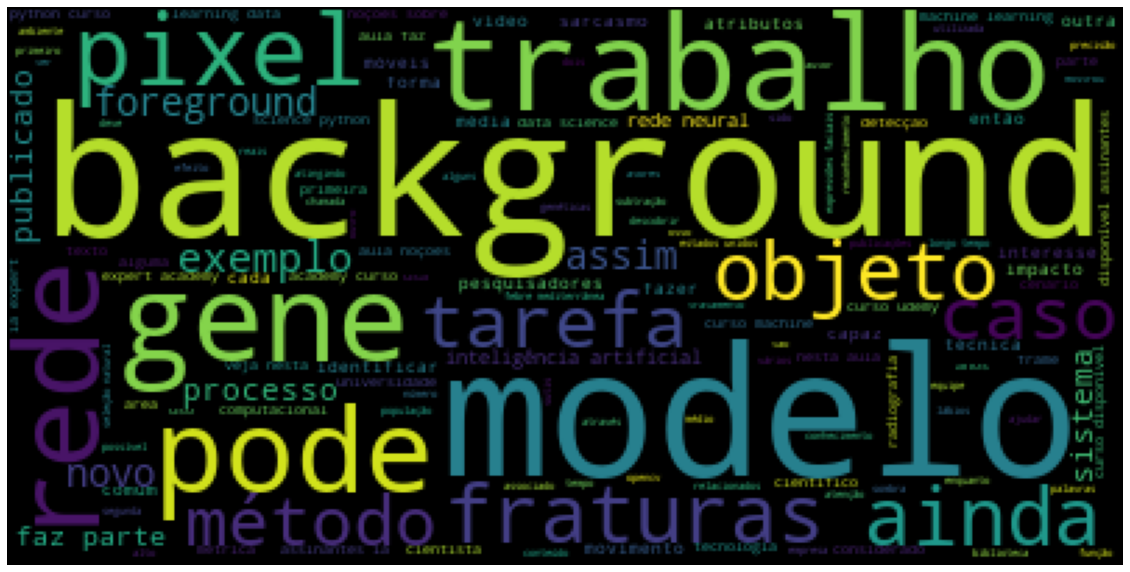

In [ ]:
#Gerar a nuvem de palavras

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.axis('off')
plt.imshow(WordCloud().generate(conteudo_feed_formatado))
plt.show()

## Extração de entidades nomeadas

   Dado um texto poderemos extrair, nomes, pessoas, endereços.

- Siglas: https://spacy.io/api/annotation#named-entities

In [ ]:
import spacy

In [ ]:
!python -m spacy download pt

✔ Download and installation successful
You can now load the model via spacy.load('pt_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/pt_core_news_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/pt
You can now load the model via spacy.load('pt')


In [ ]:
#vamos criar o objeto pln

pln = spacy.load('pt')
pln

In [ ]:
#Passar o texto formatado
documento = pln(conteudo_feed_formatado)

In [ ]:
# para gerar a marcação no texto , utilizando o displacy

from spacy import displacy
displacy.render(documento, style = 'ent', jupyter = True)

In [ ]:
#explorara as identidades
for entidade in documento.ents:
  if entidade.label_ == 'LOC':
    print(entidade.text, entidade.label_)

londres LOC
turquia LOC
europa LOC
coronavírus LOC
universidade michigan LOC
estados unidos LOC
taiwan LOC
outliers biblioteca pyod aula LOC
estados unidos LOC
ambíguo LOC
estados unidos LOC


## Sumarização de artigos de feed de notícias

In [ ]:
for artigo in artigos_blog:
  #print(artigo['titulo'])
  #print(artigo['conteudo'])
  sentencas_originais, melhores_sentencas, _ = sumarizar(artigo['conteudo'], 150, 10, 5)
  visualiza_resumo(artigo['titulo'], sentencas_originais, melhores_sentencas)
  salva_resumo(artigo['titulo'], sentencas_originais, melhores_sentencas)#esta na ultima parte do trabalho

## Geração de arquivos HTML

In [ ]:
def salva_resumo(titulo, lista_sentencas, melhores_sentencas):
  HTML_TEMPLATE = """<html>
    <head>
      <title>{0}</title>
      <meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
    </head>
    <body>{1}</body>

  </html>"""
  texto = ''
  for i in lista_sentencas:
    if i in melhores_sentencas:
      texto += str(i).replace(i, f"<mark>{i}</mark>")
    else:
      texto += i

  arquivo = open(os.path.join(titulo + '.html'), 'wb')
  html = HTML_TEMPLATE.format(titulo + ' - resumo', texto)
  arquivo.write(html.encode('utf-8'))
  arquivo.close()

## Solução para o exercício - lematização

In [ ]:
pln = spacy.load('pt')
pln

In [ ]:
def preprocessamento_lematizacao(texto):
  texto = texto.lower()
  texto = re.sub(r" +", ' ', texto)

  documento = pln(texto)
  tokens = []
  for token in documento:
    tokens.append(token.lemma_)
  
  tokens = [palavra for palavra in tokens if palavra not in stopwords and palavra not in string.punctuation]
  texto_formatado = ' '.join([str(elemento) for elemento in tokens if not elemento.isdigit()])
  
  return texto_formatado

In [ ]:
def sumarizar_lematizacao(texto, top_n_palavras, distancia, quantidade_sentencas):
  sentencas_originais = [sentenca for sentenca in nltk.sent_tokenize(texto)]
  sentencas_formatadas = [preprocessamento_lematizacao(sentenca_original) for sentenca_original in sentencas_originais]
  palavras = [palavra.lower() for sentenca in sentencas_formatadas for palavra in nltk.tokenize.word_tokenize(sentenca)]
  frequencia = nltk.FreqDist(palavras)
  top_n_palavras = [palavra[0] for palavra in frequencia.most_common(top_n_palavras)]
  notas_sentencas = calcula_nota_sentenca(sentencas_formatadas, top_n_palavras, distancia)
  melhores_sentencas = heapq.nlargest(quantidade_sentencas, notas_sentencas)
  melhores_sentencas = [sentencas_originais[i] for (nota, i) in melhores_sentencas]
  
  return sentencas_originais, melhores_sentencas, notas_sentencas

In [ ]:
artigos_blog[0]['conteudo']

'Veja nesta aula noções sobre aprendizagem por regras com sklearn. A aula faz parte do curso “Machine Learning e Data Science com Python de A à Z”.\n\n\n\nO curso está disponível para assinantes IA Expert Academy.\n\n\n\nCurso na Udemy.\n\n\n\n\n\n'

In [ ]:
sentencas_originais, melhores_sentencas, _ = sumarizar(artigos_blog[0]['conteudo'], 300, 5, 5)
visualiza_resumo(artigos_blog[0]['titulo'], sentencas_originais, melhores_sentencas)

In [ ]:
sentencas_originais, melhores_sentencas, _ = sumarizar_lematizacao(artigos_blog[0]['conteudo'], 300, 5, 5)
visualiza_resumo(artigos_blog[0]['titulo'], sentencas_originais, melhores_sentencas)